# **SurfMesh** - A Surface Meshing Python Library

[![Python Package](https://github.com/ckesanapalli//surface-mesher/actions/workflows/python-package.yml/badge.svg)](https://github.com/ckesanapalli/surface-mesher/actions/workflows/python-package.yml/badge.svg)
[![Coverage Status](https://coveralls.io/repos/github/ckesanapalli/surface-mesher/badge.svg?branch=master)](https://coveralls.io/github/ckesanapalli/surface-mesher?branch=master)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](LICENSE.txt)
[![Python Version](https://img.shields.io/pypi/pyversions/surfmesh)](https://www.python.org/downloads/)
[![SurfMesh](https://img.shields.io/pypi/v/surfmesh)](https://pypi.org/project/surfmesh/)
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.15298588.svg)](https://doi.org/10.5281/zenodo.15298588)



**SurfMesh** is a Python library for generating structured 3D surface meshes of primitive shapes, with a strong focus on **quadrilateral-dominant (quad) meshing**. The meshes are particularly suited for **visualization** and **Boundary Element Method (BEM)** simulations.

> ⚠️ This project is currently under active development.

---

## 🎯 Objective

This library aims to provide a minimal, intuitive interface for constructing **quad-based surface meshes** of primitive solids.

Use cases include:

- Geometry visualization
- Boundary Element Methods (BEM)
- Educational tooling
- Preprocessing for surface-based solvers

---

## ⚙️ Requirements

- **Python**: >= 3.10
- **Dependencies**:
  - `numpy>=1.24`
  - Optional (for examples and visualization):
    - `ipykernel`
    - `jupyterlab`
    - `matplotlib`

---

## 🚀 Installation

To install stable version via PyPI:

```bash
pip install surfmesh
```

For the latest development version via Git:

```bash
pip install git+https://github.com/ckesanapalli/surface-mesher.git
```

---

## 🧱 Basic Usage

Below are examples of how to use the library to generate and visualize meshes.

In [14]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import surfmesh as sm

plot_res = (4, 4)

## 1. Mesh Between Two Edges

Generated mesh with 190 quadrilateral faces.


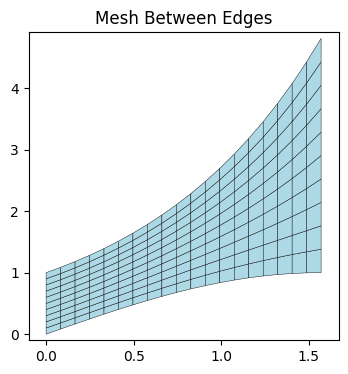

In [15]:
# Define two edges
x = np.linspace(0, np.pi / 2, 20)
edge1 = np.array([x, np.sin(x)])
edge2 = np.array([x, np.exp(x)])

# Generate the mesh
radial_resolution = 10
mesh = sm.mesh_between_edges([edge1, edge2], radial_resolution)

print(f"Generated mesh with {mesh.shape[0]} quadrilateral faces.")

fig, ax = plt.subplots(figsize=plot_res)
collection = PatchCollection(map(Polygon, mesh), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_collection(collection)
ax.set_xlim(mesh[:, :, 0].min() - 0.1, mesh[:, :, 0].max() + 0.1)
ax.set_ylim(mesh[:, :, 1].min() - 0.1, mesh[:, :, 1].max() + 0.1)
ax.set_title("Mesh Between Edges")
plt.show()

## 2. Radial Disk Mesh

Generated radial disk mesh with 200 quadrilateral faces.


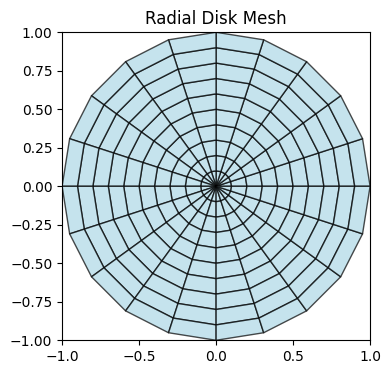

In [16]:
# Parameters for the radial disk mesh
radius = 1.0
radial_resolution = 10
segment_resolution = 20

# Generate the radial disk mesh
radial_mesh = sm.disk_mesher_radial(radius, radial_resolution, segment_resolution)

print(f"Generated radial disk mesh with {radial_mesh.shape[0]} quadrilateral faces.")

fig, ax = plt.subplots(figsize=plot_res)
patches = [Polygon(face, closed=True) for face in radial_mesh]
collection = PatchCollection(patches, facecolors="lightblue", edgecolors="k", alpha=0.7)
ax.add_collection(collection)

ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
ax.set_aspect("equal")
ax.set_title("Radial Disk Mesh")
plt.show()

## 3. Square-Centered Disk Mesh

Generated square-centered disk mesh with 225 quadrilateral faces.


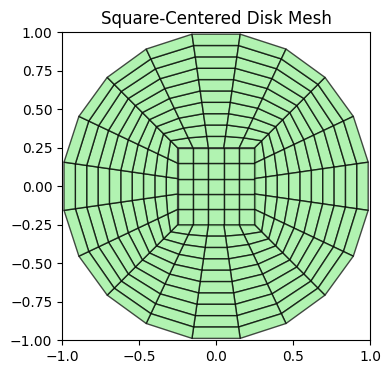

In [17]:
radius = 1.0
square_resolution = 5
radial_resolution = 10
square_side_radius_ratio = 0.5

# Generate the square-centered disk mesh
square_centered_mesh = sm.disk_mesher_square_centered(radius, square_resolution, radial_resolution, square_side_radius_ratio)

print(f"Generated square-centered disk mesh with {square_centered_mesh.shape[0]} quadrilateral faces.")

fig, ax = plt.subplots(figsize=plot_res)
collection = PatchCollection(map(Polygon, square_centered_mesh), facecolors="lightgreen", edgecolors="k", alpha=0.7)
ax.add_collection(collection)

ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
ax.set_aspect("equal")
ax.set_title("Square-Centered Disk Mesh")
plt.show()

## 4. Cuboid Mesh using Explicit Coordinates

Generated 24 quadrilateral faces.
(24, 4, 3)


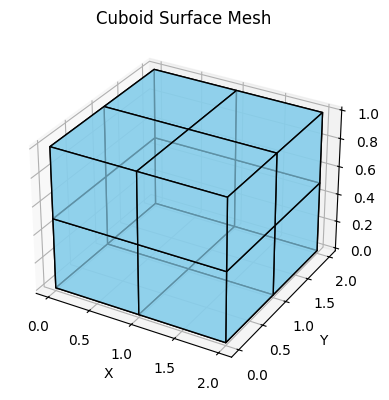

In [18]:
# Define coordinate arrays for a cuboid
x_coords = [0.0, 1.0, 2.0]
y_coords = [0.0, 1.0, 2.0]
z_coords = [0.0, 0.5, 1.0]

# Generate the cuboid surface mesh
faces = sm.cuboid_mesher(x_coords, y_coords, z_coords)

print(f"Generated {faces.shape[0]} quadrilateral faces.")
print(faces.shape)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection="3d")

# Add each quad to the 3D plot
poly = Poly3DCollection(faces, facecolors="skyblue", edgecolors="k", alpha=0.7)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Cuboid Surface Mesh")
plt.tight_layout()
plt.show()

## 5. Cuboid Mesh using Resolution

Generated cuboid with 40 quadrilateral faces.
(40, 4, 3)


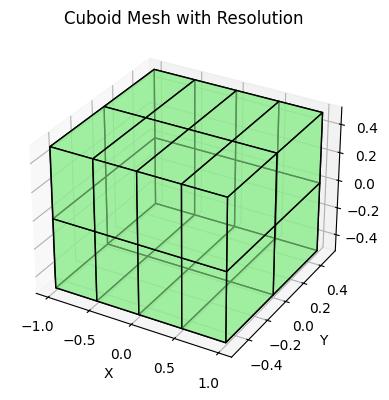

In [19]:
# Generate a cuboid mesh with resolution
length, width, height = 2.0, 1.0, 1.0
resolution = (4, 2, 2)

mesh = sm.cuboid_mesher_with_resolution(length, width, height, resolution=resolution)

print(f"Generated cuboid with {mesh.shape[0]} quadrilateral faces.")
print(mesh.shape)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection="3d")

poly = Poly3DCollection(mesh, facecolors="lightgreen", edgecolors="k", alpha=0.6)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Cuboid Mesh with Resolution")
plt.tight_layout()
plt.show()

## 6. Revolve a Curve Along a Circular Path

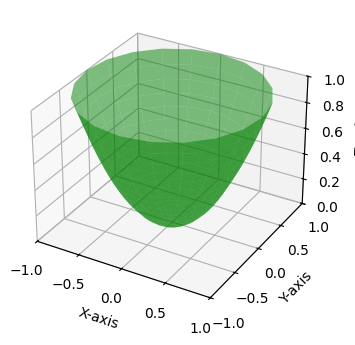

In [20]:
# Sample 2D curve coordinates
x = np.linspace(0, 1, 20)
z = x ** 2  # Example curve (parabola)

curves = np.array([x, z]).T
# Revolve the curve
segment_resolution = 20
faces = sm.circular_revolve(curves, segment_resolution, start_angle=0, end_angle=2*np.pi)

# Plotting
fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='g', linewidths=1, alpha=0.5))
ax.set_xlim(-x.max(), x.max())
ax.set_ylim(-x.max(), x.max())
ax.set_zlim(z.min(), z.max())
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

## 7. Revolve a Curve Along a Custom Path

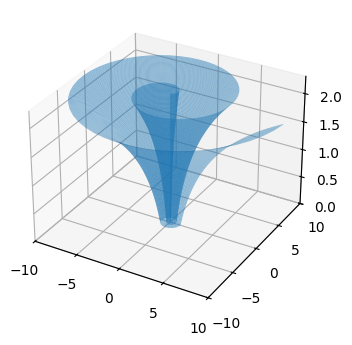

In [21]:
x = np.linspace(1, 10, 100)
z = np.log(x)
main_curve = np.array([x, z]).T

angle_rad = np.linspace(0, 4*np.pi, 100)
radius = angle_rad/10
revolve_path = np.array([angle_rad, radius]).T

revolved_mesh = sm.revolve_curve_along_path(main_curve, revolve_path)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(revolved_mesh, alpha=0.5))
ax.set_xlim(-x.max(), x.max())
ax.set_ylim(-x.max(), x.max())
ax.set_zlim(z.min(), z.max())
plt.show()

## 8. Generate a Radial Cylinder Mesh

Generated a Radial Cylinder Mesh 416.
(416, 4, 3)


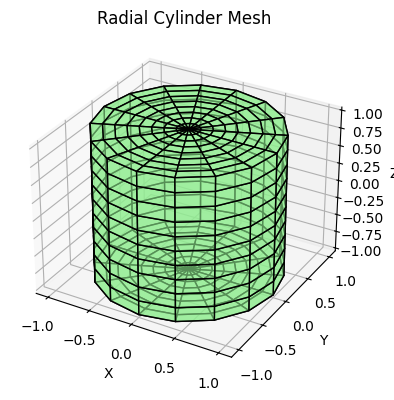

In [22]:
radius = 1.0
height = 2.0
radial_resolution = 8
segment_resolution = 16
height_resolution = 10

# Generate the cylinder mesh
mesh = sm.cylinder_mesher_radial(radius, height, radial_resolution, segment_resolution, height_resolution)

print(f"Generated a Radial Cylinder Mesh {mesh.shape[0]}.")
print(mesh.shape)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection="3d")

poly = Poly3DCollection(mesh, facecolors="lightgreen", edgecolors="k", alpha=0.6)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Radial Cylinder Mesh")
plt.tight_layout()
plt.show()

## 9. Generate a Square-Centered Cylinder Mesh

Generated a Square-Centered Cylinder Mesh.
(960, 4, 3)


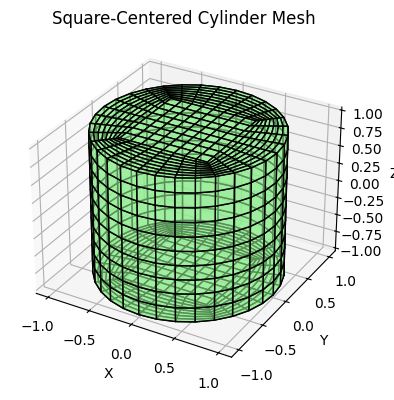

In [23]:
radius = 1.0
height = 2.0
radial_resolution = 8
half_square_side_resolution = 4
height_resolution = 10

# Generate the cylinder mesh
mesh = sm.cylinder_mesher_square_centered(radius, height, radial_resolution, half_square_side_resolution, height_resolution)

print(f"Generated a Square-Centered Cylinder Mesh.")
print(mesh.shape)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection="3d")

poly = Poly3DCollection(mesh, facecolors="lightgreen", edgecolors="k", alpha=0.6)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Square-Centered Cylinder Mesh")
plt.tight_layout()
plt.show()

## 10. Generate a Sphere Mesh Using Cube Projection

Generated a Sphere Mesh from Cube Projection.
(600, 4, 3)


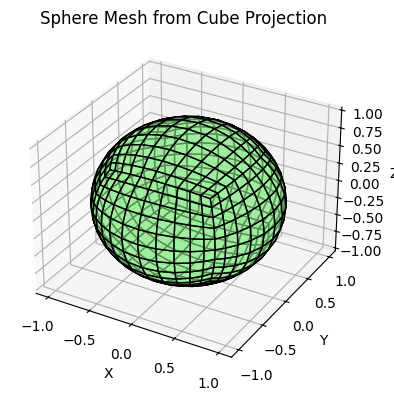

In [24]:
mesh = sm.sphere_mesher_from_projection(radius=1.0, resolution=10)

print(f"Generated a Sphere Mesh from Cube Projection.")
print(mesh.shape)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection="3d")

poly = Poly3DCollection(mesh, facecolors="lightgreen", edgecolors="k", alpha=0.6)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Sphere Mesh from Cube Projection")
plt.tight_layout()
plt.show()

## 11. Generate a Sphere Mesh Using Radial Divisions

Generated a Radial Sphere Mesh.
(400, 4, 3)


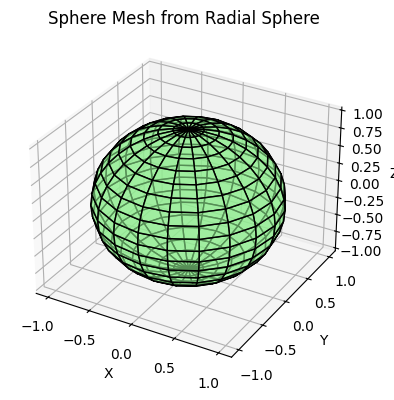

In [25]:
radius = 1.0
radial_resolution = 20
segment_resolution = 20
mesh = sm.sphere_mesher_from_radial(radius, radial_resolution, segment_resolution)

print(f"Generated a Radial Sphere Mesh.")
print(mesh.shape)

fig = plt.figure(figsize=plot_res)
ax = fig.add_subplot(111, projection="3d")

poly = Poly3DCollection(mesh, facecolors="lightgreen", edgecolors="k", alpha=0.6)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Sphere Mesh from Radial Sphere")
plt.tight_layout()
plt.show()

## 12. Extract Faces and Vertices from the mesh

In [29]:

radius = 1.0
radial_resolution = 20
segment_resolution = 20
mesh = sm.sphere_mesher_from_radial(radius, radial_resolution, segment_resolution)

vertices, faces = sm.extract_vertices_faces(mesh.round(6))

print(f"Generated a Radial Sphere Mesh with {faces.shape[0]} faces and {vertices.shape[0]} vertices.")
print(f"Vertices shape: {vertices.shape}, Faces shape: {faces.shape}")
print(f"First 5 vertices:\n{vertices[:5]}")
print(f"First 5 faces:\n{faces[:5]}")


Generated a Radial Sphere Mesh with 400 faces and 382 vertices.
Vertices shape: (382, 3), Faces shape: (400, 4)
First 5 vertices:
[[-1.        0.        0.      ]
 [-0.987688  0.       -0.156434]
 [-0.987688  0.        0.156434]
 [-0.951057 -0.309017  0.      ]
 [-0.951057  0.       -0.309017]]
First 5 faces:
[[233 235 190 190]
 [269 278 235 233]
 [295 297 278 269]
 [315 328 297 295]
 [337 339 328 315]]


## Citation
If you use this library in your research, please consider citing the following citation: [citation.bib](citation.bib)

In [11]:
from urllib.request import urlopen
from pathlib import Path

url = "https://zenodo.org/records/15298588/export/bibtex"
content = urlopen(url).read().decode("utf-8")
Path("../citation.bib").write_text(content)
print("Citation saved to citation.bib")
print("BibTeX citation:\n")
print(content)

Citation saved to citation.bib
BibTeX citation:

@software{chaitanya_kesanapalli_2025_15298588,
  author       = {Chaitanya Kesanapalli},
  title        = {SurfMesh},
  month        = apr,
  year         = 2025,
  publisher    = {Zenodo},
  version      = {v0.2},
  doi          = {10.5281/zenodo.15298588},
  url          = {https://doi.org/10.5281/zenodo.15298588},
  swhid        = {swh:1:dir:17d13ade48cf763577a55d76cbd69c3ebfda8fbb
                   ;origin=https://doi.org/10.5281/zenodo.15298035;vi
                   sit=swh:1:snp:81a5188f930fc00f53a38853ff78cf140217
                   aafc;anchor=swh:1:rel:f2b2d3966583101539faa625db75
                   16e5e1d6393d;path=ckesanapalli-surfmesh-005395d
                  },
}


## 📌 Roadmap

- [x] Cuboid surface mesh generation
- [x] Disk face mesh generation
- [x] Revolve curve mesh generation
- [x] Cylinder, and sphere support
- [ ] Curvilinear mesh
- [ ] STL/PLY export support
- [ ] Mesh visualization utilities
- [ ] Export to BEM-compatible formats